### Dependencies:

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import time
from PIL import Image
from IPython.display import display, clear_output
import pickle

In [10]:
from neural_network import predict, compute_precision

### Load Weights:

In [7]:
start = time.time()

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

weights = np.load("iteration_3_weights.npy")
weights = weights[()]

# restore np.load for future normal usage
np.load = np_load_old

end = time.time()

print(round((end - start), 3))

0.024


### Load Healthy Images:

In [8]:
directory = "Datasets/tomato/train/Tomato___healthy/"

healthy_images = []
count = 0

for filename in os.listdir(directory):
    if filename.endswith(".JPG"):
        image = cv2.imread(directory + filename)
        healthy_images.append(image)
        clear_output(wait = True)
        print("Number of pictures processed = ", count + 1)
        count += 1

Number of pictures processed =  1000


### Load Unhealthy Images:

In [32]:
directory = "Datasets/tomato/train/"

unhealthy_images = []
count = 0

for filename in os.listdir(directory):
    if filename != "Tomato___healthy": #directory where healthy dataset is stored, so that it isn't added to unhealthy dataset
        filename = directory + filename + "/"
        for file in os.listdir(filename):
            image = cv2.imread(filename + file)
            unhealthy_images.append(image)
            clear_output(wait = True)
            print("Number of pictures processed = ", count + 1)
            count += 1

Number of pictures processed =  9000


### Visualize predictions from random healthy/unhealthy images:

In [11]:
image = healthy_images[202]

start = time.time()

image_vector = np.reshape(image, (image.size, 1))
input_tensor = tf.constant(image_vector)
output = predict(input_tensor, weights)

end = time.time()

print(round((end - start), 3))

0.022


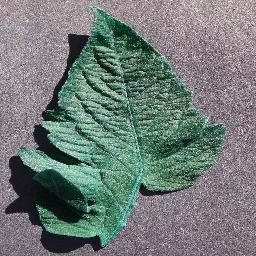

1.0


In [9]:
display(Image.fromarray(image))
print(output.numpy()[0][0])